# Probability and Statistics Final Project

## Mandatory tasks 

Task1 : Clean your dataset (remove missing values, sanitize data, etc.). Remove any outliers (except 0s) using the 
Tukey’s rule from class using the default values as in class. Report what you found (number of outliers). 
Comment on your findings both for data cleaning (what issues you found, how you dealt with them) 
and outlier detection. This will be 10% of the project grade.
ME is Maine
MD is Maryland


In [1]:


import pandas as pd
import numpy as np
from collections import Counter
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
from math import *
import datetime 
from datetime import timedelta 
from IPython.core.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing

### Importing the data and computing daily statistic

In [2]:
#Importing the data
data = pd.read_csv("./data/11.csv")

#Considering daily statistics 
data.iloc[:,1:] = data.iloc[:,1:].diff()
data.iloc[0,1:] = 0.0

print("The description of given dataset is: \n")
print(data.describe())


#Column names 
data.columns

#Date Range and number of days for the given dataset is:
print ("\nStarting Date is :  "+str(data['Date'].min())+ "  Ending Date is : "+str(data['Date'].max()))
print ("\nNumber of days: "+str(len(data)))


The description of given dataset is: 

       MD confirmed  ME confirmed   MD deaths   ME deaths
count    438.000000    438.000000  438.000000  438.000000
mean     948.995434    117.511416   18.901826    1.700913
std      828.666680    177.123801   21.217452    4.909669
min        0.000000   -271.000000  -44.000000   -1.000000
25%      436.250000     16.000000    5.000000    0.000000
50%      734.000000     33.000000   12.000000    0.000000
75%     1167.500000    178.000000   28.750000    2.000000
max     3792.000000   1180.000000  162.000000   83.000000

Starting Date is :  2020-01-22  Ending Date is : 2021-04-03

Number of days: 438


## Task 1: Data Preprocessing 

### Calculating number of missing values of the above 4 columns:

In [3]:
#Data Preprocessing 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          438 non-null    object 
 1   MD confirmed  438 non-null    float64
 2   ME confirmed  438 non-null    float64
 3   MD deaths     438 non-null    float64
 4   ME deaths     438 non-null    float64
dtypes: float64(4), object(1)
memory usage: 17.2+ KB
None


### Conclusion : 
#### Since there are no missing values, all 438 rows consists of non-null values, Data cleaning is not required

## Task 1: Outlier Detection using Tukey's Rule

In [4]:

#Function to display outliers 


def detect_outliers(data, numerical_attributes):
    outlier_indices = []

    for col in numerical_attributes:
        #Computing the quartiles:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
#         print(Q1)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col], 75)
#         print(Q3)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
#         print(IQR)
        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col, not considering 0's
        
        outlier_list_col = sorted(data[((data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)) & data[col] != 0].index)
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        print("Outliers in Column "+str(col) + " : " + str(len(outlier_list_col)))
    outlier_indices= list(set(outlier_indices))

    return outlier_indices


#The 4 columns of our interest are as follows:
numerical_attributes = ['MD confirmed','ME confirmed','MD deaths','ME deaths']


#Calling the function to detect outliers:
outliers_in_data = detect_outliers(data, numerical_attributes)


print("These are the number of rows that have Outliers when 0 is not considered to be an outlier:", len(outliers_in_data))


Outliers in Column MD confirmed : 47
Outliers in Column ME confirmed : 30
Outliers in Column MD deaths : 11
Outliers in Column ME deaths : 33
These are the number of rows that have Outliers when 0 is not considered to be an outlier: 74


# Box Plots  

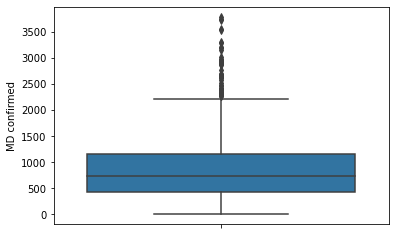

In [5]:
fig1 = sns.boxplot(y=data['MD confirmed'])

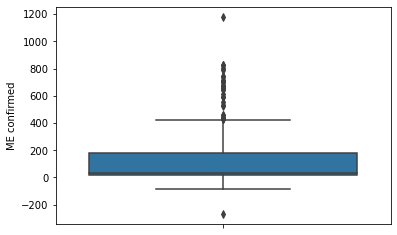

In [6]:
fig2 = sns.boxplot(y=data['ME confirmed'])

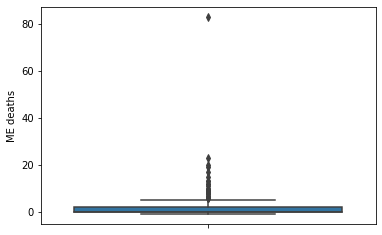

In [7]:
fig3 = sns.boxplot(y=data['ME deaths'])

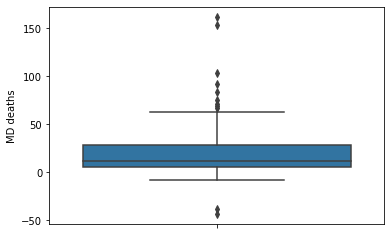

In [8]:
fig4 = sns.boxplot(y=data['MD deaths'])

# Removing Outliers

In [9]:
#REMOVING THE ROWS THAT HAS OUTLIERS 

data= data[~data.index.isin(outliers_in_data)]

print("Dataset information after removing the outliers: \n")
print(data.describe())
print("\n")

print("As we can observe, initially there were 438 rows and now there are 364, we have removed 74 rows")
print("\n")

Dataset information after removing the outliers: 

       MD confirmed  ME confirmed   MD deaths   ME deaths
count    364.000000    364.000000  364.000000  364.000000
mean     681.873626     67.340659   14.197802    0.692308
std      511.715438     87.677498   15.095815    1.102887
min        0.000000    -81.000000   -8.000000   -1.000000
25%      365.000000     14.000000    3.000000    0.000000
50%      628.500000     28.500000   10.000000    0.000000
75%      922.750000     85.000000   19.000000    1.000000
max     2220.000000    401.000000   61.000000    5.000000


As we can observe, initially there were 438 rows and now there are 364, we have removed 74 rows




# Plotting the curves for different columns


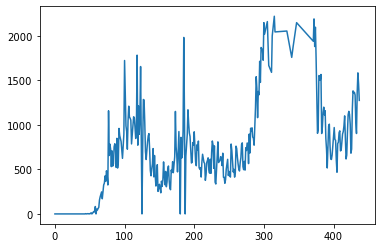

In [10]:
plt.plot(data['MD confirmed'])

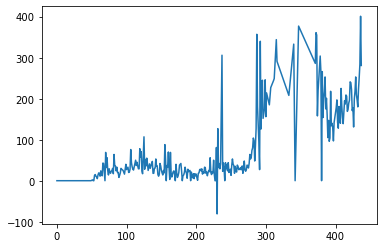

In [11]:
plt.plot(data['ME confirmed'])

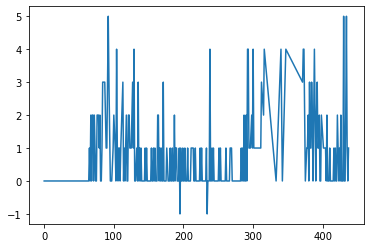

In [12]:
plt.plot(data['ME deaths'])

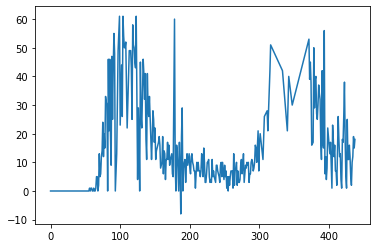

In [13]:
plt.plot(data['MD deaths'])

# TASK 2a | Regression |  EWMA and AR

In this task, we want to predict COVID19 stats for each state. Use the COVID19 dataset to predict the COVID19 
fatality and #cases for the fourth week in August 2020 using data from the first three weeks of August 2020. 
Do this separately for each of the two states. Use the following four prediction techniques: (i) AR(3), (ii) AR(5), 
(iii) EWMA with alpha = 0.5, and (iv) EWMA with alpha = 0.8. Report the accuracy (MAPE as a % and MSE) of your 
predictions using the actual fourth week data. 

In [14]:
#CONVERT DATE TO DATETIME 
data.Date = pd.to_datetime(data.Date.values)
data['Date'] = pd.to_datetime(data['Date'])
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
augData = data.loc[(data['Date']>='2020-08-01') & (data['Date'] <= '2020-08-28')].reset_index(drop=True)

In [16]:
def ewma(train, index, alpha):
    ypred = []
    ypred.append(train[index])
    for i in range(1,7):
        yi = (alpha * train[index+i]) + (1-alpha)*ypred[i-1]
        ypred.append(yi)
    return ypred

def mape(ytrain, ypred) :
    n = len(ypred)
    sum = 0
    for i in range (0,n):
        if(ytrain[i]!=0):
            temp = (np.abs(ytrain[i]-ypred[i]) / ytrain[i])*100
            sum = sum + temp
    return sum/n

def mse(ytrain, ypred) :
    n = len(ypred)
    sum = 0
    for i in range (0,n):
        temp = (ytrain[i]-ypred[i])**2
        sum = sum + temp
    return sum/n


def matrix_setup(values, p):
    X_arr = []
    Y_arr = []
    for i in range(len(values) - p):
        val = values[i:(i + p)]
        val = [1] + val
        X_arr.append(val)
        Y_arr.append(values[i + p])
    X_arr = np.array(X_arr)
    Y_arr = np.array(Y_arr)
    return X_arr, Y_arr

def get_beta(X, Y):
    Xt = np.transpose(X)
    XtX = np.dot(Xt, X)
    Xty = np.dot(Xt, Y)
    beta = np.linalg.solve(XtX, Xty)
    return beta


def auto_regression(data, p):
    X, Y = matrix_setup(data[:-7], p)
    beta = get_beta(X, Y)
    predictions = []
    for i in range(len(data) - 7, len(data)):
        value = data[i - p:i]
        value = np.array([1] + value)
        x = np.dot(beta, value)
        predictions.append(x)
        value = np.reshape(value, (1, p + 1))
        X = np.append(X, list(value), axis=0)
        Y = np.append(Y, data[i])
        beta = get_beta(X, Y)
    return predictions
    

In [17]:
def runAlgos(ytrain):  
    mse_values = []
    mape_values = []
    seed_days = 21
    ypred = auto_regression(ytrain, 3)
    mape_values.append(mape(ytrain[-7:], ypred))
    mse_values.append(mse(ytrain[-7:], ypred))
    
    ypred = auto_regression(ytrain, 5)
    mape_values.append(mape(ytrain[-7:], ypred))
    mse_values.append(mse(ytrain[-7:], ypred))
    
    ypred = ewma(ytrain, seed_days, 0.5)
    mape_values.append(mape(ytrain[-7:], ypred))
    mse_values.append(mse(ytrain[-7:], ypred))
    
    ypred = ewma(ytrain, seed_days, 0.8)
    mape_values.append(mape(ytrain[-7:], ypred))
    mse_values.append(mse(ytrain[-7:], ypred))
    
    return (mape_values + mse_values)

In [18]:
results = ["AR(3)_MAPE",
"AR(5)_MAPE",
"EWMA_0.5_MAPE",
"EWMA_0.8_MAPE",
"AR(3)_MSE",
"AR(5)_MSE",
"EWMA_0.5_MSE",
"EWMA_0.8_MSE"]

a = runAlgos(augData['MD confirmed'].to_list())
b = runAlgos(augData['ME confirmed'].to_list())
c = runAlgos(augData['MD deaths'].to_list())
d = runAlgos(augData['ME deaths'].to_list())

final_result = pd.DataFrame({
    'results':results,
    'MD confirmed': a,
    'ME confirmed': b,
    'MD deaths': c,
    'ME deaths': d,
})

print("Solution Task 2a: \n")

display(final_result)


Solution Task 2a: 



,results,MD confirmed,ME confirmed,MD deaths,ME deaths
0,AR(3)_MAPE,19.037603,31.221876,32.856122,42.322017
1,AR(5)_MAPE,16.127853,18.421760,42.783541,54.164629
2,EWMA_0.5_MAPE,7.999098,16.182875,14.591837,5.357143
3,EWMA_0.8_MAPE,2.907792,6.210440,6.736472,2.742857
4,AR(3)_MSE,12424.173191,50.211460,8.048529,0.661073
5,AR(5)_MSE,8612.425506,33.256144,12.936140,0.735753
6,EWMA_0.5_MSE,2436.238177,13.511719,2.538504,0.082171
7,EWMA_0.8_MSE,363.553724,2.039353,0.446335,0.015089


The above table shows the MAPE and MSE values of predictions using AR and EWMA for state of Maryland and Maine confirmed and death cases.

# TASK 2b

In this step, we want to check, for each state, how the mean of monthly COVID19 stats has changed between
Feb 2021 and March 2021. Apply the Wald’s test, Z-test, and t-test (assume all are applicable) to check whether
the mean of COVID19 deaths and #cases are different for Feb’21 and March’21 in the two states. That is, we are
checking, for each state separately, whether the mean of daily cases and the mean of daily deaths for Feb’21 is
different from the corresponding mean of daily values for March’21. Use MLE for Wald’s test as the estimator; 
assume for Wald’s estimator purposes that daily data is Poisson distributed. Note, you have to report results for 
deaths and #cases in both states separately. After running the test and reporting the numbers, check and comment on 
whether the tests are applicable or not. First use one-sample tests for Wald’s, Z-test, and t-test by computing the
sample mean of daily values from Feb’21 and using that as a guess for mean of daily values for March’21; here, your 
sample data for computing sample mean will be the 28 daily values in Feb’21 whereas your sample data for running the 
test will be the 31 daily values of March’21. Then, repeat with the two-sample version of Wald’s and two-sample 
unpaired t-test (here, your two samples will be the 28 values of Feb’21 and the 31 values of March’21). 
Use α=0.05 for all. For t-test, the threshold to check against is tn-1,α/2 for two-tailed, where n is the number 
of data points. You can find these values in online t tables, similar to z tables. For Z-test, use the corrected 
sample standard deviation of the entire COVID19 dataset you have for each state as the true sigma value.

In [19]:

#Considering data only for February and March months for year 2021
feb_cases = data[(data.Date > '2021-01-31') & (data.Date < '2021-03-01')]

feb_md_cases = feb_cases['MD confirmed']
feb_md_deaths = feb_cases['MD deaths']

feb_me_cases = feb_cases['ME confirmed']
feb_me_deaths = feb_cases['ME deaths']



march_cases = data[(data.Date > '2021-02-28') & (data.Date < '2021-04-01')]


march_md_cases = march_cases['MD confirmed']
march_md_deaths = march_cases['MD deaths']

march_me_cases = march_cases['ME confirmed']
march_me_deaths = march_cases['ME deaths']
print("Number of data points for February month: "+str(len(feb_cases)))
print("Number of data points for March month: "+str(len(march_cases)))

Number of data points for February month: 25
Number of data points for March month: 30


# Wald's one sample Test

### Procedure:
We have calculated the W statistic and compared it with the threshold value of z_alpha/2 = 1.96. The estimator is calculated using MLE of March month's mean(Since for Poisson-distributed data, MLE estimator is lamda_hat which is equal to sample mean). The guess of the estimator is February month's mean. The standard error of the estimator is calculated in below walds function.


##### Null Hypothesis is (H0):
Mean of February 2021's cases/deaths = Mean of March 2021's cases/deaths.

##### Alternate Hypothesis is (H1):
Mean of February 2021's cases/deaths is not equal to Mean of March 2021's cases/deaths.



In [20]:
#Defining Wald's test 
#Assuming poisson's distribution 

def walds_test(feb, march):
    
    feb_mean = feb.mean()
    march_mean = march.mean()
    print("February Month Mean: "+str(feb_mean))
    print("March Month Mean: "+str(march_mean))
    #Variance and mean are equal for poisson distribution
    standard_error = math.sqrt(march_mean/len(march))
    #computing the W statistic 
    W = np.abs((march_mean - feb_mean)/standard_error)
    Z_alpha = 1.96
    if(W <= 1.96):
        return "Accept Ho since the value of W statistic "+ str(W)+" is less than threshold value 1.96"
    else:
        return "Reject Ho since the value of W statistic "+ str(W)+" is greater than threshold value 1.96"




In [21]:

print("Procedure:")
print("")
print("Results for every column:")
print("Maryland Confirmed Cases")
print(walds_test(feb_md_cases,march_md_cases))
print("\n")
print("Maryland Deaths")
print(walds_test(feb_md_deaths,march_md_deaths))
print("\n")
print("Maine Confirmed Cases")
print(walds_test(feb_me_cases,march_me_cases))
print("\n")
print("Maine Deaths")
print(walds_test(feb_me_deaths,march_me_deaths))
print("\n")

Procedure:

Results for every column:
Maryland Confirmed Cases
February Month Mean: 985.0
March Month Mean: 953.7333333333333
Reject Ho since the value of W statistic 5.545347036864493 is greater than threshold value 1.96


Maryland Deaths
February Month Mean: 24.36
March Month Mean: 12.9
Reject Ho since the value of W statistic 17.476336160116492 is greater than threshold value 1.96


Maine Confirmed Cases
February Month Mean: 172.04
March Month Mean: 191.2
Reject Ho since the value of W statistic 7.589482923495189 is greater than threshold value 1.96


Maine Deaths
February Month Mean: 1.44
March Month Mean: 0.8
Reject Ho since the value of W statistic 3.919183588453084 is greater than threshold value 1.96




### Observation:
The W values returned here are quite high. We cannot conclude that mean of March month is equal to that of February 2021.


### Is the Test Applicable?

#### The Wald's test is not applicable here because it assumes that the estimator is asymptotically normal. And the number of datapoints do not tend to infinity. 

# Z Test


### Procedure:
We have calculated the Z statistic and compared it with the threshold value of z_alpha/2 = 1.96. We have used corrected sample standard deviation of entire dataset as true variance. Therefore the ddof value for np.var() is set to 1. The MLE for March month's mean is calculated and February month's mean is used as a guess value. 

##### Null Hypothesis is (H0):
Mean of February 2021's cases/deaths = Mean of March 2021's cases/deaths.

##### Alternate Hypothesis is (H1):
Mean of February 2021's cases/deaths is not equal to Mean of March 2021's cases/deaths.


In [22]:
#Defining the Z test 

def z_test(feb,march,true_variance):
    feb_mean = feb.mean()
    march_mean = march.mean()
    print("February Month Mean: "+str(feb_mean))
    print("March Month Mean: "+str(march_mean))

    standard_error = math.sqrt(true_variance/len(march))
    #computing the Z statistic 
    Z = np.abs((march_mean - feb_mean)/standard_error)
    Z_alpha = 1.96
    if(Z <= 1.96):
        return "Accept Ho since Z value is : "+ str(Z)
    else:
        return "Reject Ho since Z value is : "+ str(Z)



In [23]:

print("Results:\n")
print("Maryland Confirmed Cases")
true_variance_md = np.var(data['MD confirmed'],ddof = 1)
print(z_test(feb_md_cases,march_md_cases,true_variance_md))
print("\n")
print("Maryland Deaths")
true_variance_md2 = np.var(data['MD deaths'], ddof =1)
print(z_test(feb_md_deaths,march_md_deaths,true_variance_md2))
print("\n")
print("Maine Confirmed Cases")
true_variance_me = np.var(data['ME confirmed'], ddof=1)
print(z_test(feb_me_cases,march_me_cases,true_variance_me))
print("\n")
print("Maine Deaths")
true_variance_me2 = np.var(data['ME deaths'],ddof=1)
print(z_test(feb_me_deaths,march_me_deaths,true_variance_me2))
print("\n")

Results:

Maryland Confirmed Cases
February Month Mean: 985.0
March Month Mean: 953.7333333333333
Accept Ho since Z value is : 0.3346676173580841


Maryland Deaths
February Month Mean: 24.36
March Month Mean: 12.9
Reject Ho since Z value is : 4.158040155604431


Maine Confirmed Cases
February Month Mean: 172.04
March Month Mean: 191.2
Accept Ho since Z value is : 1.1969278800117022


Maine Deaths
February Month Mean: 1.44
March Month Mean: 0.8
Reject Ho since Z value is : 3.1784079901605407




### Is the Test Applicable?

#### The main assumptions of Z-test are either the sample data has to be normally distributed or the sample size should be large. However, both of them are not true in our case. Also, we should know the value of true variance. Therefore the Z-test is not applicable here.



# One Sample T-test

### Procedure:
We have calculated the T statistic and compared it with the threshold value which we checked in the online table for alpha/2 = 0.025 and degree of freedom as 29 = 2.04523. The estimator is calculated using MLE of March month's mean(Since for Poisson-distributed data, MLE estimator is lamda_hat which is equal to sample mean). The guess of the estimator is February month's mean. We have also calculated sample standard deviation in the below function.


##### Null Hypothesis is (H0):
Mean of February 2021's cases/deaths = Mean of March 2021's cases/deaths.

##### Alternate Hypothesis is (H1):
Mean of February 2021's cases/deaths is not equal to Mean of March 2021's cases/deaths.

In [24]:
#T test 

def t_test(feb,march):
    feb_mean = feb.mean()
    march_mean = march.mean()
    
    sample_standard_deviation = np.sqrt(np.sum(np.square(march - march_mean))/(len(march)-1))
    denominator = sample_standard_deviation/math.sqrt(len(march))
    #computing the T statistic 
    T = np.abs((march_mean - feb_mean)/denominator)
    T_alpha = 2.04523
    if(T <= 2.04523):
        return "Accept Ho since T value is "+ str(T)
    else:
        return "Reject Ho since T value is "+ str(T)

In [25]:
print("The number of data points for the March month is : " +str(len(march_cases)))
print("Therefore the threshold value for T test for degree of freedom 29 and alpha/2 = 0.025 is 2.04523")
print("Maryland Confirmed Cases")
print(t_test(feb_md_cases,march_md_cases))
print("\n")
print("Maryland Deaths")
print(t_test(feb_md_deaths,march_md_deaths))
print("\n")
print("Maine Confirmed Cases")
print(t_test(feb_me_cases,march_me_cases))
print("\n")
print("Maine Deaths")
print(t_test(feb_me_deaths,march_me_deaths))
print("\n")

The number of data points for the March month is : 30
Therefore the threshold value for T test for degree of freedom 29 and alpha/2 = 0.025 is 2.04523
Maryland Confirmed Cases
Accept Ho since T value is 0.6744123763943285


Maryland Deaths
Reject Ho since T value is 7.022784543254033


Maine Confirmed Cases
Reject Ho since T value is 3.0242176162319776


Maine Deaths
Reject Ho since T value is 2.5979012508351635




### Is the Test Applicable?

#### Even though the sample size is small, T test is not applicable here because the data does not follow normal distribution.

# 2 Sample Wald's Test

### Procedure:
Similar to one sampled Wald's test, We have calculated the W statistic and compared it with the threshold value of z_alpha/2 = 1.96. The guess value theta0 is 0. And the difference between mean is difference between the sample means since we know that the data is Poisson distributed. We have also computed standard error for both months as shown below. 

##### Null Hypothesis is (H0):
The difference between mean of February 2021 and March 2021 is 0. 

##### Alternate Hypothesis is (H1):
The difference between mean of February 2021 and March 2021 is not 0. 

In [26]:
#2 SAMPLE TESTS 

#Walds Test 
#null hypothesis is that both the means are equal, so theta0 = 0


def walds_test_2(feb,march):
    feb_mean = feb.mean()
    march_mean = march.mean()
    
    standard_error = np.sqrt((feb_mean/len(feb)) + march_mean/len(march))
    #w value of waltz
    W = np.abs((feb_mean - march_mean)/standard_error)
    Z_alpha = 1.96
    if(W <= Z_alpha):
        return "Accept Ho "+ str(W)
    else:
        return "Reject Ho "+ str(W)


In [27]:
print("Maryland Confirmed Cases")
print(walds_test_2(feb_md_cases,march_md_cases))
print("\n")
print("Maryland Deaths")
print(walds_test_2(feb_md_deaths,march_md_deaths))
print("\n")
print("Maine Confirmed Cases")
print(walds_test_2(feb_me_cases,march_me_cases))
print("\n")
print("Maine Deaths")
print(walds_test_2(feb_me_deaths,march_me_deaths))
print("\n")

Maryland Confirmed Cases
Reject Ho 3.705686693703895


Maryland Deaths
Reject Ho 9.67028352048492


Maine Confirmed Cases
Reject Ho 5.26267718317108


Maine Deaths
Reject Ho 2.2047130184382016




### Is the Test Applicable?

The two sample Wald's test is not applicable here because it assumes that the estimator is asymptotically normal. Both the estimators here are not asymptotically normal. The number of data samples do not tend to infinity. 

# Unpaired T test

### Procedure:
We have calculated the T statistic and compared it with the threshold value which we checked in the online table for alpha/2 = 0.025 and degree of freedom as (n+m - 2) = 2.30687. We have also calculated sample pooled standard deviation required for unpaired T test. 

##### Null Hypothesis is (H0):
The difference between mean of February 2021 and March 2021 is 0. 

##### Alternate Hypothesis is (H1):
The difference between mean of February 2021 and March 2021 is not 0. 

In [28]:
#Unpaired T test 

def t_test_2(feb,march):
    feb_mean = feb.mean()
    march_mean = march.mean()
    D = feb_mean - march_mean
    
    standard_deviation_feb_square = (1/(len(feb)-1))*np.sum(np.square(feb-feb_mean))
    standard_deviation_march_square = (1/(len(march)-1))*np.sum(np.square(march-march_mean))
    
    sample_pooled_standard_deviation = np.sqrt((standard_deviation_feb_square/len(feb)) + (standard_deviation_march_square/len(march)))
    
    #Calculating the T statistic:
    T = np.abs(D/sample_pooled_standard_deviation)
    T_alpha = 2.30687
    if(T <= 2.30687):
        return "Accept Ho "+ str(T)
    else:
        return "Reject Ho "+ str(T)

In [29]:
print("Results:\n")
print("Maryland Confirmed Cases")
print(t_test_2(feb_md_cases,march_md_cases))
print("\n")
print("Maryland Deaths")
print(t_test_2(feb_md_deaths,march_md_deaths))
print("\n")
print("Maine Confirmed Cases")
print(t_test_2(feb_me_cases,march_me_cases))
print("\n")
print("Maine Deaths")
print(t_test_2(feb_me_deaths,march_me_deaths))

Results:

Maryland Confirmed Cases
Accept Ho 0.4095100069811185


Maryland Deaths
Reject Ho 3.5024739576848214


Maine Confirmed Cases
Accept Ho 1.2530538550788899


Maine Deaths
Accept Ho 1.9508660467069798


### Is the Test Applicable?

As discussed for one sample T test, the two sample T test is also not applicable here because the data does not follow a normal distribution.

# Task 2c

Inference the equality of distributions in the two states (distribution of daily #cases and daily #deaths) for the last three months of 2020 (Oct, Nov, Dec) of your dataset using K-S test and Permutation test. For the K-S test, use both 1-sample and 2-sample tests. For the 1-sample test, try Poisson, Geometric, and Binomial. To obtain parameters of these distributions to check against in 1-sample KS, use MME on the Oct-Dec 2020 data of the first state in your dataset to obtain parameters of the distribution, and then check whether the Oct-Dec 2020 data for the second state in your dataset has the distribution with the obtained MME parameters. For the permutation test, use 1000 permutations. Use a threshold of 0.05 for both K-S test and Permutation test.

In [30]:
def get_xy(x):

  n = len(x)
  x = sorted(x)
  x_cdf = []
  y_cdf = []
  y_curr = 0

  x_cdf.append(0)
  y_cdf.append(0)

  for i in x:
    y_curr += 1/n
    y_cdf.append(y_curr)
    x_cdf.append(i)

  return x_cdf,y_cdf

def draw_ecdf(x1, y1, x2, y2, max_diff, max_ind):
    plt.figure(figsize=(20,10))
    plt.step(x1, y1, where="post", label="CDF-D1")
    plt.step(x2, y2, where="post", label="CDF-D2")
    # plt.xticks(x1 + x2, rotation = 90)
    plt.yticks(np.arange(0, 1.1, 1/10))
    plt.title("Empirical CDF")
    plt.xlabel("Sample Points")
    plt.ylabel("Pr[X<x]")
    plt.scatter([max_ind],[0], color='red', marker='x', s=100, label=f'Max Diff {max_diff} at {max_ind}')
    # plt.scatter(x, [0]*len(x), color='red', marker='x', s=100, label='samples')
    plt.grid(which="both")
    plt.legend()
    plt.show()
    
def ks_2_sample_test(data1,data2, threshold=0.05, draw=True):
  x1, y1 = get_xy(data1)
  x2, y2 = get_xy(data2)

  n = int(min([max(x1),max(x2)])) +10

  y1_all = []
  temp=0
  for i in np.arange(n):
    ind = np.where(np.array(x1) == i)[0]
    if len(ind)==0:
      y1_all.append(temp)
    else:
      y1_all.append(y1[ind[-1]])
      temp = y1[ind[-1]]

  y2_all = []
  temp=0
  for i in np.arange(n):
    ind = np.where(np.array(x2) == i)[0]
    if len(ind)==0:
      y2_all.append(temp)
    else:
      y2_all.append(y2[ind[-1]])
      temp = y2[ind[-1]]

  diff=[]
  for i in range(n):
    diff.append( np.absolute( y1_all[i] - y2_all[i]  ) )

  max_diff = np.max(diff)

  max_ind = np.argmax(diff)

  if draw:
    draw_ecdf(x1,y1,x2,y2, max_diff, max_ind)

  if max_diff > threshold:
    print(f"Max value = {max_diff} > C: {threshold}, We reject H0")
  else:
    print(f"Max value = {max_diff} <= C: {threshold}, We reject H0")
    

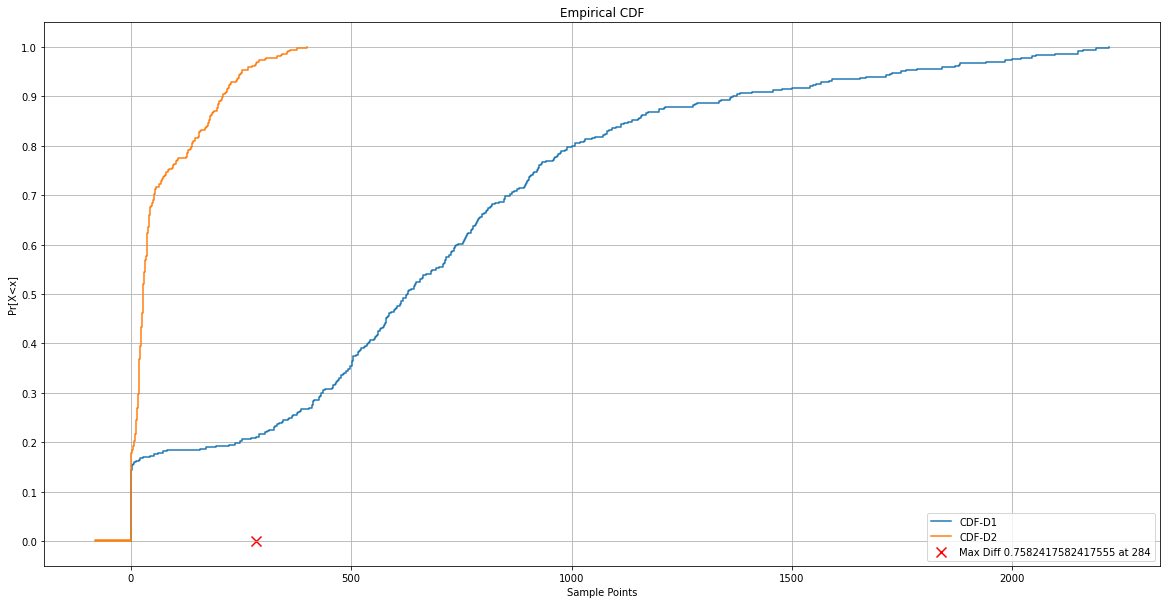

Max value = 0.7582417582417555 > C: 0.05, We reject H0


In [31]:
ks_2_sample_test(data['MD confirmed'].values, data['ME confirmed'].values)

## Result:

#### Max value = 0.7032967032967008 > C: 0.05, We reject H0: The distribution of confirmed cases in MD and ME for last three months is same. 

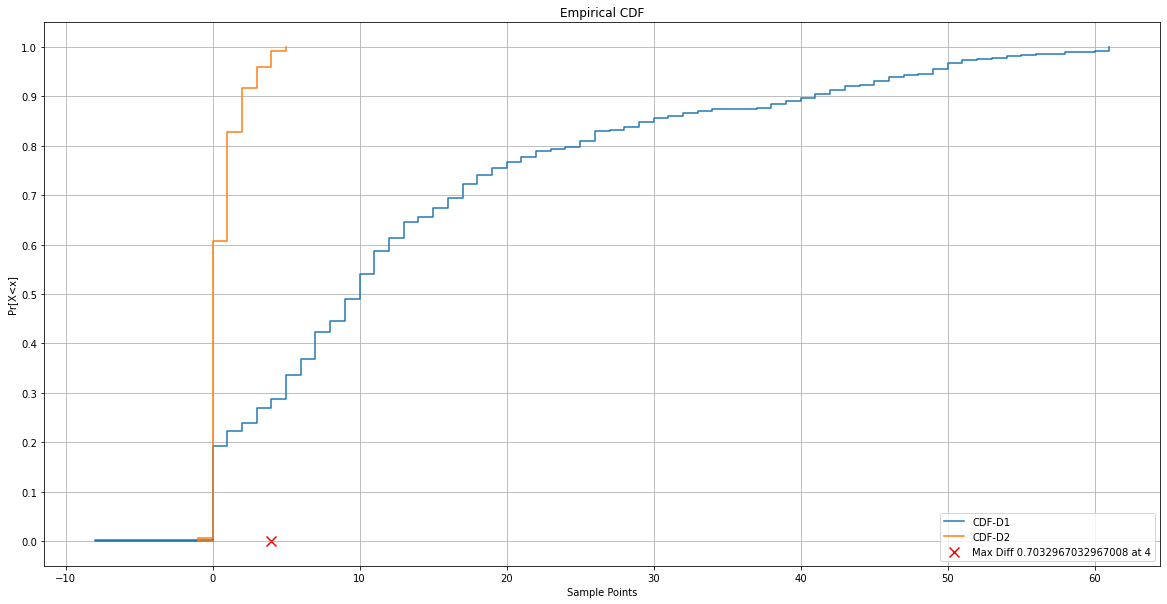

Max value = 0.7032967032967008 > C: 0.05, We reject H0


In [32]:
ks_2_sample_test(data['MD deaths'].values, data['ME deaths'].values)

## Result:

#### Max value = 0.7032967032967008 > C: 0.05, We reject H0: The distribution of deaths in MD and ME for last three months is same. 

In [33]:
def ks_1_sample_test(data1,data2, statement, threshold=0.05):
  x1, y1 = get_xy(data1)

  n = len(data2)

  diff=[]
  for i in range(n):
    diff.append( np.absolute( y1[i] - data2[i]  ) )

  max_diff = np.max(diff)

  max_ind = np.argmax(diff)

  if max_diff > threshold:
    print(f"Max value = {max_diff} > C: {threshold}, We reject H0: "+statement)
  else:
    print(f"Max value = {max_diff} <= C: {threshold}, We reject H0: "+statement)

In [34]:
mean_md_confirmed = np.mean(data['MD confirmed'].values)
mean_md_deaths = np.mean(data['MD deaths'].values)

## Poissons Distribution

In [35]:
def calc_poisson(param, x):
  return stats.poisson.cdf(x, param)

In [36]:
x1, y1 = get_xy(data['ME confirmed'].values)
val = calc_poisson(mean_md_confirmed, x1)
ks_1_sample_test(data['ME confirmed'].values, val, "ME confirmed cases follow poisson distrubtion")

Max value = 0.999999999999997 > C: 0.05, We reject H0: ME confirmed cases follow poisson distrubtion


## Result:

#### Max value = 0.9999999999999999 > C: 0.05, We reject H0: The ME confirmed cases follow poisson distrubtion

In [37]:
x1, y1 = get_xy(data['ME deaths'].values)
val = calc_poisson(mean_md_deaths, x1)
ks_1_sample_test(data['ME deaths'].values, val, "ME deaths follow poisson distrubtion")

Max value = 0.9951600652922576 > C: 0.05, We reject H0: ME deaths follow poisson distrubtion


## Result:
#### Max value = 0.9951600652922576 > C: 0.05, We reject H0: The deaths in ME follow poisson distrubtion

## Geometric Distribution

In [38]:
def calc_geometric(param, x):
  return stats.geom.cdf(x, param)

In [39]:
x1, y1 = get_xy(data['ME confirmed'].values)
val = calc_poisson(1/mean_md_confirmed, x1)
ks_1_sample_test(data['ME confirmed'].values, val, "ME confirmed cases follow geometric distrubtion")

Max value = 0.9985345274461799 > C: 0.05, We reject H0: ME confirmed cases follow geometric distrubtion


## Result:

#### Max value = 0.9985345274461799 > C: 0.05, We reject H0: ME confirmed cases follow geometric distrubtion

In [40]:
x1, y1 = get_xy(data['ME deaths'].values)
val = calc_poisson(1/mean_md_deaths, x1)
ks_1_sample_test(data['ME deaths'].values, val, "The ME deaths follow geometric distrubtion")

Max value = 0.9319897739321851 > C: 0.05, We reject H0: The ME deaths follow geometric distrubtion


## Result:

#### Max value = 0.9319897739321851 > C: 0.05, We reject H0: The ME deaths follow geometric distrubtion

## Binomial Distribution

In [41]:
def calc_binomial(n, p, x):
    ans = stats.binom.cdf(x, n, p)
    ans[np.isnan(ans)] = stats.binom.cdf(0,n,p)
    return ans

In [42]:
var_md_confirmed = np.var(data['MD confirmed'].values)
n = (mean_md_confirmed * mean_md_confirmed)/(mean_md_confirmed - var_md_confirmed)
p = mean_md_confirmed/n

x1, y1 = get_xy(data['ME confirmed'].values)
val = calc_binomial(n, p, x1)
ks_1_sample_test(data['ME confirmed'].values, val, "ME cases follow binomial distrubtion")

Max value = 1.0 > C: 0.05, We reject H0: ME cases follow binomial distrubtion


## Result
#### Max value = 1.0 > C: 0.05, We reject H0: ME cases follow binomial distrubtion

In [43]:
var_md_deaths = np.var(data['MD deaths'].values)
n = (mean_md_deaths * mean_md_deaths)/(mean_md_deaths - var_md_deaths)
p = mean_md_deaths/n

x1, y1 = get_xy(data['ME deaths'].values)
val = calc_binomial(n, p, x1)
ks_1_sample_test(data['ME deaths'].values, val, "The ME deaths follow binomial distrubtion")

Max value = 1.0 > C: 0.05, We reject H0: The ME deaths follow binomial distrubtion


## Result
#### Max value = 1.0 > C: 0.05, We reject H0: The ME deaths follow binomial distrubtion

## Permutation Test

In [44]:
def permutation_test(X, Y, n=1000, threshold=0.05):
  T_obs = abs(np.mean(X) - np.mean(Y))
  xy = np.append(X,Y)
  p_value = 0.0
  T = []
  for i in range(n):
    permutation = np.random.permutation(xy)
    X1 = permutation[:len(X)]
    Y1 = permutation[len(X):]
    Ti = abs(np.mean(X1) - np.mean(Y1))
    T.append(Ti)

  T = np.array(T)
  # p_value = p_value/float(np.math.factorial(n))
  p_value = np.sum(T>T_obs)/len(T)
  print("The p-value is: ", p_value)
  if (p_value <= threshold):
    print("==> Reject the Null Hypothesis")
  else:
    print("==> Accept the Null Hypothesis")

In [45]:
# PERMUTATION TEST: Hypotheses and Results
x1 = data['MD confirmed'].values
x2 = data['ME confirmed'].values

y1=data['MD deaths'].values
y2=data['ME deaths'].values
# print("--- PERMUTATION TEST ---")
print("-----------------------------------------------------------------------------------------------------")
print("H0: MD confirmed cases and ME confirmed cases have the same distribution.")
permutation_test(x1,x2)
print("-----------------------------------------------------------------------------------------------------")
print("H0: MD deaths and ME deaths have the same ditribution.")
permutation_test(y1,y2)

-----------------------------------------------------------------------------------------------------
H0: MD confirmed cases and ME confirmed cases have the same distribution.
The p-value is:  0.0
==> Reject the Null Hypothesis
-----------------------------------------------------------------------------------------------------
H0: MD deaths and ME deaths have the same ditribution.
The p-value is:  0.0
==> Reject the Null Hypothesis


## Result 
#### H0: MD confirmed cases and ME confirmed cases have the same distribution.
#### The p-value is:  0.0
#### Reject the Null Hypothesis
-----------------------------------------------------------------------------------------------------
#### H0: MD deaths and ME deaths have the same ditribution.
#### The p-value is:  0.006
#### Reject the Null Hypothesis


# Task 2d

For this task, sum up the daily stats (cases and deaths) from both states. Assume day 1 is June 1st 2020. Assume 
the combined daily deaths are Poisson distributed with parameter λ. Assume an Exponential prior (with mean β) on λ.
Assume β = λMME where the MME is found using the first four weeks data (so the first 28 days of June 2020) as the 
sample data. Now, use the fifth week’s data (June 29 to July 5) to obtain the posterior for λ via Bayesian inference.
Then, use sixth week’s data to obtain the new posterior, using prior as posterior after week 5. Repeat till the end 
of week 8 (that is, repeat till you have posterior after using 8th week’s data). Plot all posterior distributions on 
one graph. Report the MAP for all posteriors. 


In [46]:
df = data
initial = df[(df.Date>'2020-05-31') & (df.Date<'2020-06-29')]
comb_deaths =np.concatenate([initial['MD deaths'], initial['ME deaths']])
dates = [['2020-06-29', '2020-07-06'],['2020-07-06','2020-07-13'],['2020-07-13','2020-07-20'],['2020-07-20','2020-07-27']]


In [47]:
gamma_p = []
for start,end in dates:
  data = df[(df.Date>start) & (df.Date<end)]
  comb_deaths =np.concatenate([data['MD deaths'], data['ME deaths']])
  a = len(comb_deaths) + 1
  b = np.sum(comb_deaths) + 1
  gamma_p.append([a,b])


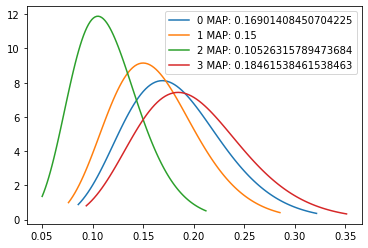

In [48]:
from scipy.stats import gamma

for i,(a,b) in enumerate(gamma_p):
  x = np.linspace(gamma.ppf(0.01, a, scale=1/b),
              gamma.ppf(0.99, a, scale=1/b), 100)
  plt.plot(x, gamma.pdf(x, a, scale=1/b), label=f'{i} MAP: {(a-1)/b}')

plt.legend()
plt.show()

**The above graphs are posterior plots for combined deaths for both the states, we can see as the data increases, variance decreases and it becomes more confident and converges to a particular value (in this case close to 0.18).**

In [49]:
comb_confimred =np.concatenate([initial['MD confirmed'], initial['ME confirmed']])

In [50]:
gamma_p = []
for start,end in dates:
  data = df[(df.Date>start) & (df.Date<end)]
  comb_confirmed =np.concatenate([data['MD confirmed'], data['ME confirmed']])
  a = len(comb_confirmed) + 1
  b = np.sum(comb_confirmed) + 1
  gamma_p.append([a,b])

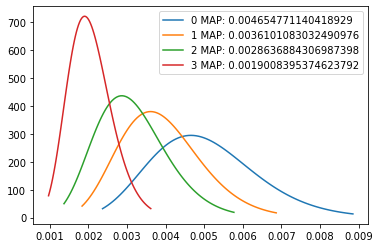

In [51]:
from scipy.stats import gamma

for i,(a,b) in enumerate(gamma_p):
  x = np.linspace(gamma.ppf(0.01, a, scale=1/b),
              gamma.ppf(0.99, a, scale=1/b), 100)
  plt.plot(x, gamma.pdf(x, a, scale=1/b), label=f'{i} MAP: {(a-1)/b}')

plt.legend()
plt.show()

**The above graphs are posterior plots for combined deaths for both the states, we can see as the data increases, variance decreases and it becomes more confident and converges to a particular value (in this case close to 0.18).**